In [3]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline


def team_to_int_dict():
    teams = list(Game.objects.all().values_list('team', flat=True).distinct())
    return {team:teams.index(team) for team in teams}

team_ids = team_to_int_dict()

def prep_model_input(player_list):
    return np.array([[team_ids[stat.game.team], stat.game.home] 
                      for stat in player_list])

def run_model(train_input, train_answer, test_input, test_answer):
    rfc = RandomForestClassifier ()
    rfc.fit(train_input, train_answer)
    predicted = rfc.predict(test_input)
    
    plt.figure(figsize=(13,7))
    plt.plot(test_answer)
    plt.plot(predicted)
    return accuracy_score(test_answer, predicted)

def get_train_test_players():
    train_players = PlayerData.objects.filter(game__week__lte=13)
    test_players = PlayerData.objects.filter(game__week=14)
    return train_players, test_players

def player_stat_arrays(player_list):
    final_dict = player_list[0].to_dict()
    final_dict = {stat_name:np.array([]) for stat_name in final_dict.keys()}
    for player in player_list:
        player_dict = player.to_dict()
        for stat in final_dict.keys():
            new_list = np.append(final_dict[stat], [player_dict[stat]])
            final_dict[stat] = new_list
    return final_dict

train_players, test_players = get_train_test_players()

pass_completions accuracy score = 0.035398230088495575
rush_attempts accuracy score = 0.07964601769911504
rec_touchdowns accuracy score = 1.0
rec_yards accuracy score = 1.0
pass_touchdowns accuracy score = 0.23008849557522124
pass_yards accuracy score = 0.0
rush_yards accuracy score = 0.017699115044247787
interceptions accuracy score = 0.39823008849557523
rush_touchdowns accuracy score = 0.6814159292035398
pass_attempts accuracy score = 0.061946902654867256
receptions accuracy score = 1.0


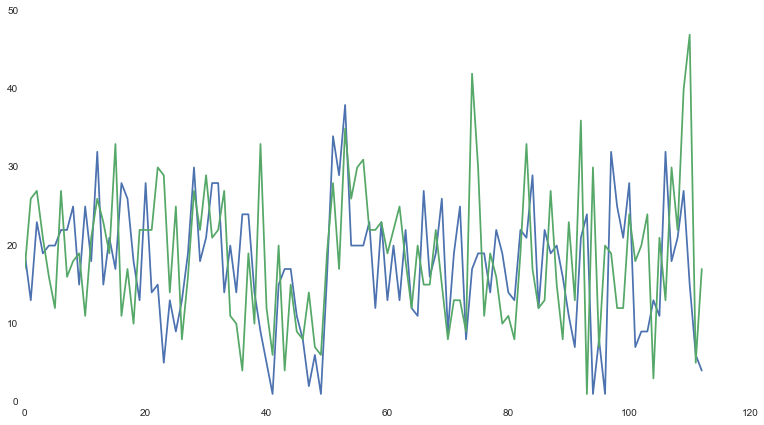

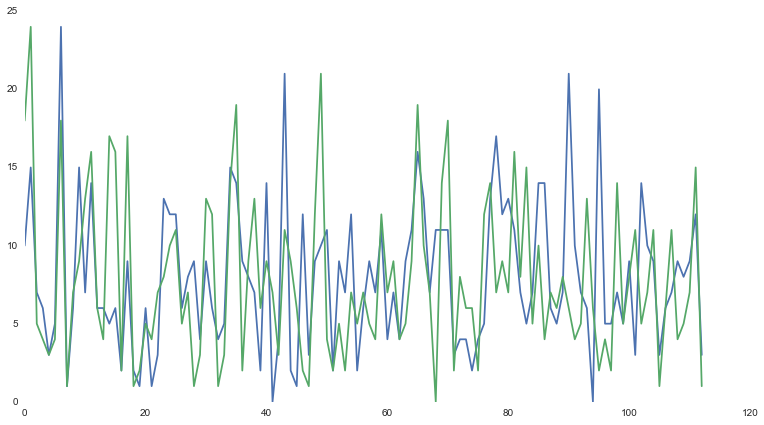

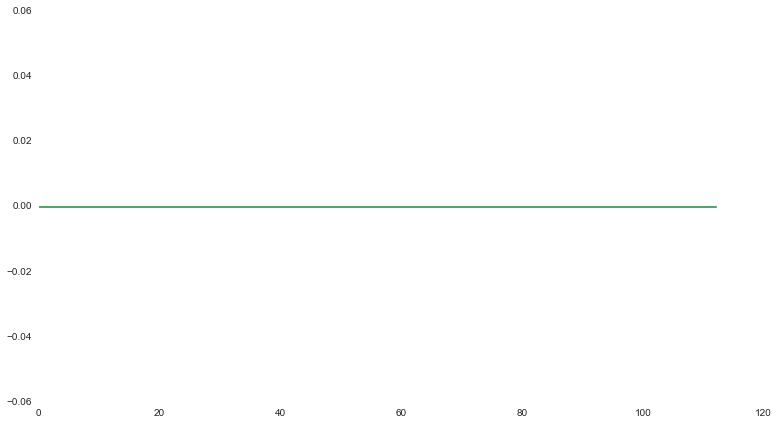

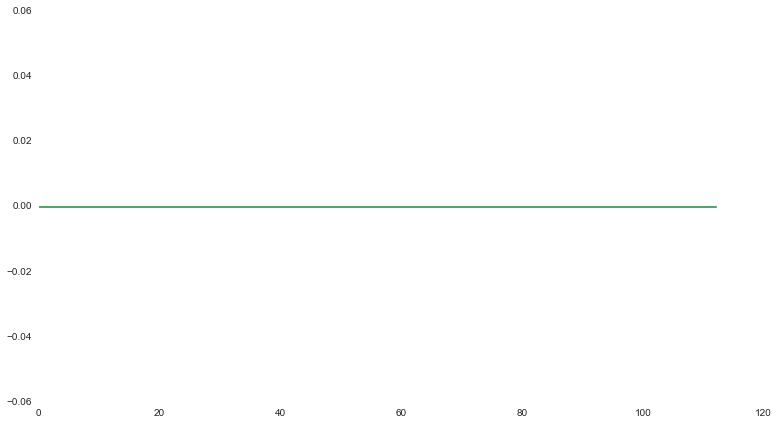

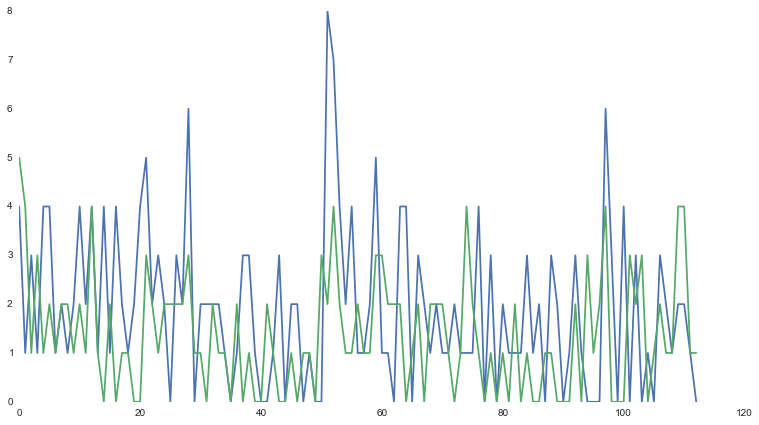

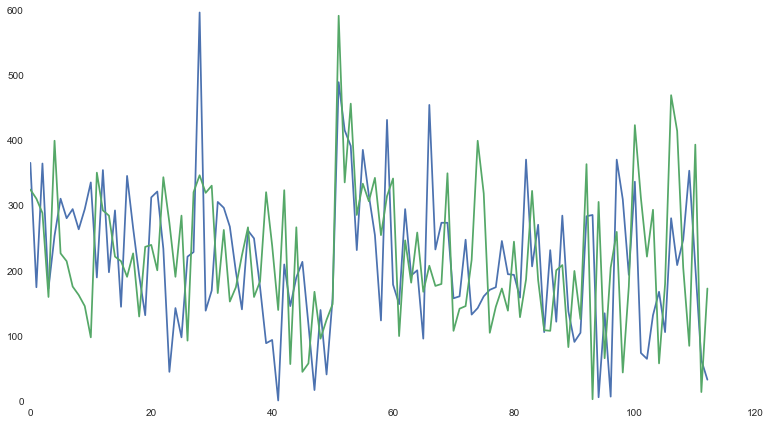

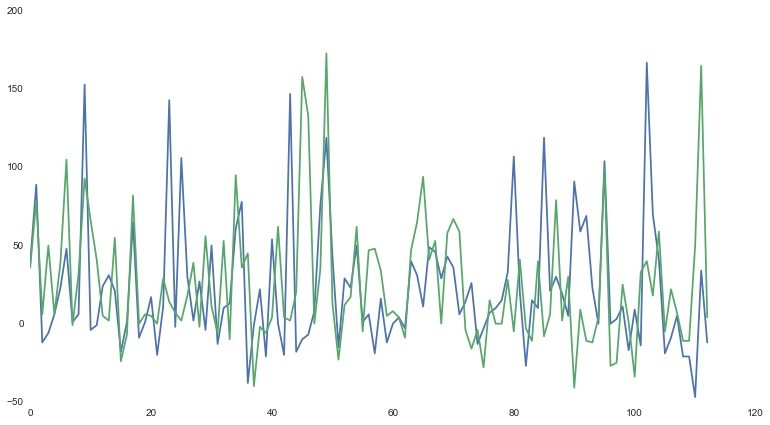

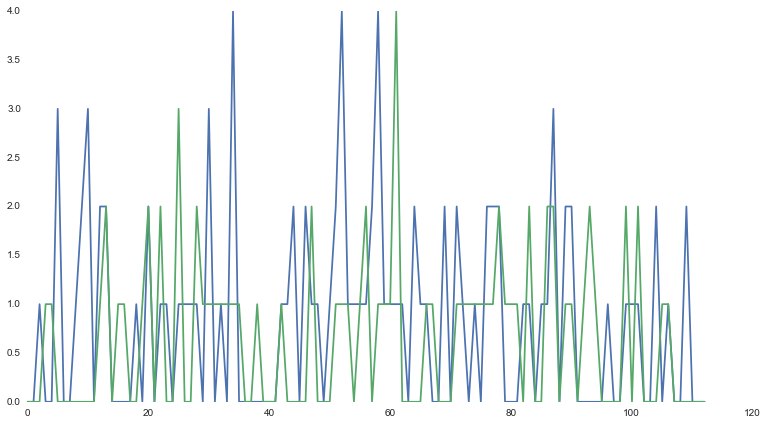

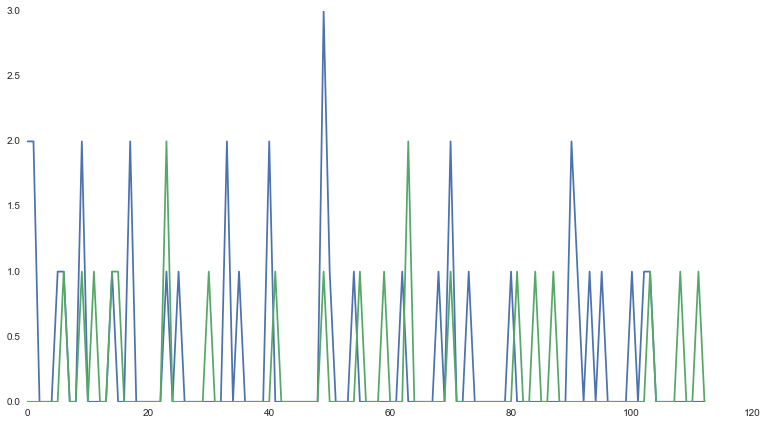

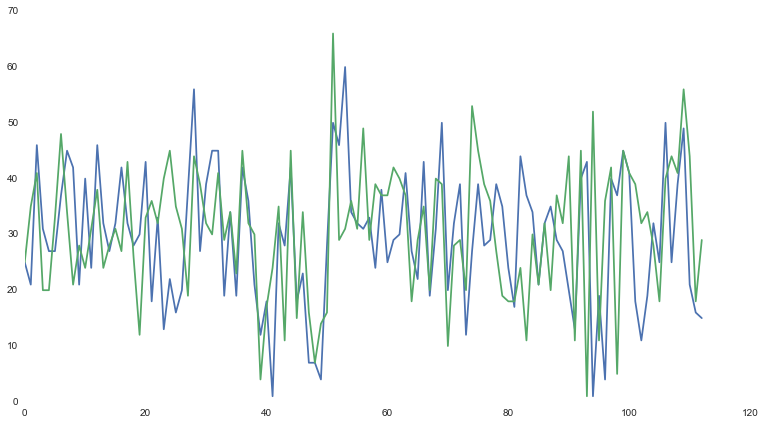

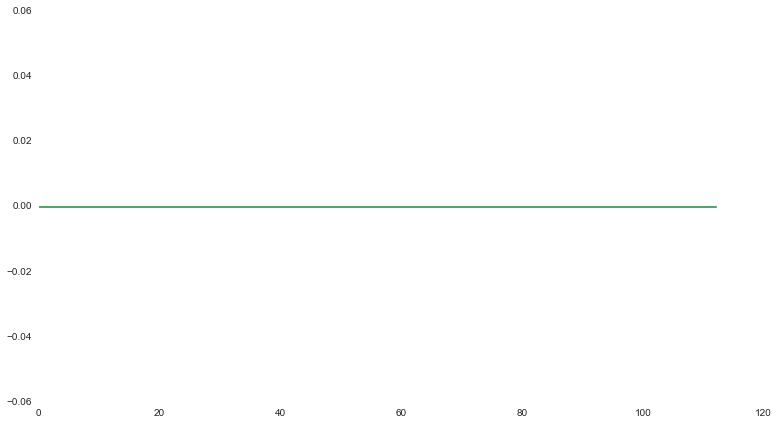

In [4]:
train_input = prep_model_input(train_players)
test_input = prep_model_input(test_players)

train_players_dict = player_stat_arrays(train_players)
test_players_dict = player_stat_arrays(test_players)

for player_stat in train_players_dict.keys():
    accuracy = run_model(train_input, train_players_dict[player_stat], test_input, test_players_dict[player_stat])
    print('{} accuracy score = {}'.format(player_stat, accuracy))